In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [87]:
df = pd.read_csv('/Users/wickedbear/Coding/Projects/Final_Proj/CSV_Files/cleaned_df2.csv')

In [88]:
df

,Unnamed: 0,Coupon,Yield,Moody's Rating,Names,Ticker,Weight (%),Price,Shares,Market Value,Notional Value,Sector,Exchange,Market Cap (intraday) 5,Trailing P/E,Forward P/E 1,PEG Ratio (5 yr expected) 1,Price/Sales (ttm),Price/Book (mrq),Beta (5Y Monthly),% Held by Insiders 1,% Held by Institutions 1,Avg Vol (10 day) 3,Avg Vol (3 month) 3,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
0,0,3.250,3.580000,A3,aflac inc,AFL,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,1858.0
1,1,4.000,3.440000,A3,aflac inc,AFL,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,9740.0
2,2,6.450,2.411028,A3,aflac inc,AFL,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,7488.0
3,3,3.625,2.130000,A3,aflac inc,AFL,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,1736.0
4,4,2.875,2.480000,A3,aflac inc,AFL,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,2435.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,1833,3.450,2.460000,Baa1,ebay inc,EBAY,0.09,38.14,575844.0,21962690.16,21962690.16,Consumer Discretionary,NASDAQ,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,1630.0
1834,1834,2.600,2.270000,Baa1,ebay inc,EBAY,0.09,38.14,575844.0,21962690.16,21962690.16,Consumer Discretionary,NASDAQ,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,882.0
1835,1835,4.000,4.160000,Baa1,ebay inc,EBAY,0.09,38.14,575844.0,21962690.16,21962690.16,Consumer Discretionary,NASDAQ,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,8187.0
1836,1836,2.875,2.060000,Baa1,ebay inc,EBAY,0.09,38.14,575844.0,21962690.16,21962690.16,Consumer Discretionary,NASDAQ,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,534.0


In [89]:
pd.set_option("display.max_columns", 45)

In [90]:
df

,Unnamed: 0,Coupon,Yield,Moody's Rating,Names,Ticker,Weight (%),Price,Shares,Market Value,Notional Value,Sector,Exchange,Market Cap (intraday) 5,Trailing P/E,Forward P/E 1,PEG Ratio (5 yr expected) 1,Price/Sales (ttm),Price/Book (mrq),Beta (5Y Monthly),% Held by Insiders 1,% Held by Institutions 1,Avg Vol (10 day) 3,Avg Vol (3 month) 3,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
0,0,3.250,3.580000,A3,aflac inc,AFL,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,1858.0
1,1,4.000,3.440000,A3,aflac inc,AFL,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,9740.0
2,2,6.450,2.411028,A3,aflac inc,AFL,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,7488.0
3,3,3.625,2.130000,A3,aflac inc,AFL,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,1736.0
4,4,2.875,2.480000,A3,aflac inc,AFL,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,2435.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,1833,3.450,2.460000,Baa1,ebay inc,EBAY,0.09,38.14,575844.0,21962690.16,21962690.16,Consumer Discretionary,NASDAQ,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,1630.0
1834,1834,2.600,2.270000,Baa1,ebay inc,EBAY,0.09,38.14,575844.0,21962690.16,21962690.16,Consumer Discretionary,NASDAQ,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,882.0
1835,1835,4.000,4.160000,Baa1,ebay inc,EBAY,0.09,38.14,575844.0,21962690.16,21962690.16,Consumer Discretionary,NASDAQ,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,8187.0
1836,1836,2.875,2.060000,Baa1,ebay inc,EBAY,0.09,38.14,575844.0,21962690.16,21962690.16,Consumer Discretionary,NASDAQ,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,534.0


In [91]:
cols_drop = ['Unnamed: 0']

In [92]:
df.drop(columns=cols_drop, inplace=True)

In [93]:
df

,Coupon,Yield,Moody's Rating,Names,Ticker,Weight (%),Price,Shares,Market Value,Notional Value,Sector,Exchange,Market Cap (intraday) 5,Trailing P/E,Forward P/E 1,PEG Ratio (5 yr expected) 1,Price/Sales (ttm),Price/Book (mrq),Beta (5Y Monthly),% Held by Insiders 1,% Held by Institutions 1,Avg Vol (10 day) 3,Avg Vol (3 month) 3,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
0,3.250,3.580000,A3,aflac inc,AFL,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,1858.0
1,4.000,3.440000,A3,aflac inc,AFL,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,9740.0
2,6.450,2.411028,A3,aflac inc,AFL,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,7488.0
3,3.625,2.130000,A3,aflac inc,AFL,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,1736.0
4,2.875,2.480000,A3,aflac inc,AFL,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,2435.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,3.450,2.460000,Baa1,ebay inc,EBAY,0.09,38.14,575844.0,21962690.16,21962690.16,Consumer Discretionary,NASDAQ,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,1630.0
1834,2.600,2.270000,Baa1,ebay inc,EBAY,0.09,38.14,575844.0,21962690.16,21962690.16,Consumer Discretionary,NASDAQ,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,882.0
1835,4.000,4.160000,Baa1,ebay inc,EBAY,0.09,38.14,575844.0,21962690.16,21962690.16,Consumer Discretionary,NASDAQ,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,8187.0
1836,2.875,2.060000,Baa1,ebay inc,EBAY,0.09,38.14,575844.0,21962690.16,21962690.16,Consumer Discretionary,NASDAQ,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,534.0


In [94]:
df["Moody's Rating"].value_counts()

Baa1    425
A3      316
Baa2    268
A2      207
WR      143
A1      135
Baa3    111
Aaa      75
Aa2      46
Aa1      37
Ba1      35
Ba3      17
B2       10
Aa3       9
Ba2       3
Caa1      1
Name: Moody's Rating, dtype: int64

In [95]:
X.isna().sum()

Coupon                                   0
Yield                                    0
Weight (%)                               0
Price                                    0
Shares                                   0
Market Value                             0
Notional Value                           0
Market Cap (intraday) 5                  0
Trailing P/E                             0
Forward P/E 1                            0
PEG Ratio (5 yr expected) 1              0
Price/Sales (ttm)                        0
Price/Book (mrq)                         0
Beta (5Y Monthly)                        0
% Held by Insiders 1                     0
% Held by Institutions 1                 0
Avg Vol (10 day) 3                       0
Avg Vol (3 month) 3                      0
Shares Outstanding 5                     0
Profit Margin                            0
Operating Margin (ttm)                   0
Return on Assets (ttm)                   0
Revenue Per Share (ttm)                  0
Quarterly R

In [96]:
cols_drop = ["Names", "Ticker"]

In [97]:
df = df.drop(columns=cols_drop)

In [98]:
df

,Coupon,Yield,Moody's Rating,Weight (%),Price,Shares,Market Value,Notional Value,Sector,Exchange,Market Cap (intraday) 5,Trailing P/E,Forward P/E 1,PEG Ratio (5 yr expected) 1,Price/Sales (ttm),Price/Book (mrq),Beta (5Y Monthly),% Held by Insiders 1,% Held by Institutions 1,Avg Vol (10 day) 3,Avg Vol (3 month) 3,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
0,3.250,3.580000,A3,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,1858.0
1,4.000,3.440000,A3,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,9740.0
2,6.450,2.411028,A3,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,7488.0
3,3.625,2.130000,A3,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,1736.0
4,2.875,2.480000,A3,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,2435.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,3.450,2.460000,Baa1,0.09,38.14,575844.0,21962690.16,21962690.16,Consumer Discretionary,NASDAQ,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,1630.0
1834,2.600,2.270000,Baa1,0.09,38.14,575844.0,21962690.16,21962690.16,Consumer Discretionary,NASDAQ,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,882.0
1835,4.000,4.160000,Baa1,0.09,38.14,575844.0,21962690.16,21962690.16,Consumer Discretionary,NASDAQ,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,8187.0
1836,2.875,2.060000,Baa1,0.09,38.14,575844.0,21962690.16,21962690.16,Consumer Discretionary,NASDAQ,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,534.0


In [99]:
list(df["Moody's Rating"].unique())

['A3',
 'Baa2',
 'WR',
 'Baa1',
 'A2',
 'Ba3',
 'Aa1',
 'A1',
 'Aa3',
 'Ba1',
 'Baa3',
 'B2',
 'Aa2',
 'Aaa',
 'Ba2',
 'Caa1']

In [100]:
rating_dict = {
    
 'Aaa':0,
 'Aa1':1,   
 'Aa2':2,   
 'Aa3':3, 
 'A1':4,
 'A2':5,    
 'A3':6,
 'Baa1':7,
 'Baa2':8,
 'Baa3':9,
 'Ba1':10,
 'Ba2':11,
 'Ba3':12,
 'B2':13,
 'Caa1':14,
 'WR':15,
    
    }


In [101]:
df["Moody's Rating"] = df["Moody's Rating"].replace(rating_dict)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1838 entries, 0 to 1837
Data columns (total 31 columns):
Coupon                            1838 non-null float64
Yield                             1838 non-null float64
Moody's Rating                    1838 non-null int64
Weight (%)                        1838 non-null float64
Price                             1838 non-null float64
Shares                            1838 non-null float64
Market Value                      1838 non-null float64
Notional Value                    1838 non-null float64
Sector                            1838 non-null object
Exchange                          1838 non-null object
Market Cap (intraday) 5           1838 non-null float64
Trailing P/E                      1838 non-null float64
Forward P/E 1                     1838 non-null float64
PEG Ratio (5 yr expected) 1       1838 non-null float64
Price/Sales (ttm)                 1838 non-null float64
Price/Book (mrq)                  1838 non-null float64
B

In [103]:
df = df.loc[df["Moody's Rating"] != 11]
df = df.loc[df["Moody's Rating"] != 14]

In [104]:
df

,Coupon,Yield,Moody's Rating,Weight (%),Price,Shares,Market Value,Notional Value,Sector,Exchange,Market Cap (intraday) 5,Trailing P/E,Forward P/E 1,PEG Ratio (5 yr expected) 1,Price/Sales (ttm),Price/Book (mrq),Beta (5Y Monthly),% Held by Insiders 1,% Held by Institutions 1,Avg Vol (10 day) 3,Avg Vol (3 month) 3,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
0,3.250,3.580000,6,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,1858.0
1,4.000,3.440000,6,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,9740.0
2,6.450,2.411028,6,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,7488.0
3,3.625,2.130000,6,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,1736.0
4,2.875,2.480000,6,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,2435.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,3.450,2.460000,7,0.09,38.14,575844.0,21962690.16,21962690.16,Consumer Discretionary,NASDAQ,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,1630.0
1834,2.600,2.270000,7,0.09,38.14,575844.0,21962690.16,21962690.16,Consumer Discretionary,NASDAQ,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,882.0
1835,4.000,4.160000,7,0.09,38.14,575844.0,21962690.16,21962690.16,Consumer Discretionary,NASDAQ,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,8187.0
1836,2.875,2.060000,7,0.09,38.14,575844.0,21962690.16,21962690.16,Consumer Discretionary,NASDAQ,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,534.0


In [105]:
df = pd.get_dummies(df, dummy_na=True)

In [106]:
df

,Coupon,Yield,Moody's Rating,Weight (%),Price,Shares,Market Value,Notional Value,Market Cap (intraday) 5,Trailing P/E,Forward P/E 1,PEG Ratio (5 yr expected) 1,Price/Sales (ttm),Price/Book (mrq),Beta (5Y Monthly),% Held by Insiders 1,% Held by Institutions 1,Avg Vol (10 day) 3,Avg Vol (3 month) 3,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity,Sector_Communication,Sector_Consumer Discretionary,Sector_Consumer Staples,Sector_Energy,Sector_Financials,Sector_Health Care,Sector_Industrials,Sector_Information Technology,Sector_Materials,Sector_Real Estate,Sector_Utilities,Sector_nan,Exchange_NASDAQ,Exchange_New York Stock Exchange Inc.,Exchange_nan
0,3.250,3.580000,6,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,1858.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,4.000,3.440000,6,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,9740.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,6.450,2.411028,6,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,7488.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,3.625,2.130000,6,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,1736.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,2.875,2.480000,6,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,2435.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,3.450,2.460000,7,0.09,38.14,575844.0,21962690.16,21962690.16,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,1630.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1834,2.600,2.270000,7,0.09,38.14,575844.0,21962690.16,21962690.16,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,882.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1835,4.000,4.160000,7,0.09,38.14,575844.0,21962690.16,21962690.16,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,8187.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1836,2.875,2.060000,7,0.09,38.14,575844.0,21962690.16,21962690.16,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,534.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [107]:
y = df["Moody's Rating"]
X = df.drop("Moody's Rating", axis=1)
X.head()


,Coupon,Yield,Weight (%),Price,Shares,Market Value,Notional Value,Market Cap (intraday) 5,Trailing P/E,Forward P/E 1,PEG Ratio (5 yr expected) 1,Price/Sales (ttm),Price/Book (mrq),Beta (5Y Monthly),% Held by Insiders 1,% Held by Institutions 1,Avg Vol (10 day) 3,Avg Vol (3 month) 3,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity,Sector_Communication,Sector_Consumer Discretionary,Sector_Consumer Staples,Sector_Energy,Sector_Financials,Sector_Health Care,Sector_Industrials,Sector_Information Technology,Sector_Materials,Sector_Real Estate,Sector_Utilities,Sector_nan,Exchange_NASDAQ,Exchange_New York Stock Exchange Inc.,Exchange_nan
0,3.250,3.580000,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.9,30.05,9.3,45.032679,6.57,39.85,1858.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,4.000,3.440000,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.9,30.05,9.3,45.032679,6.57,39.85,9740.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,6.450,2.411028,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.9,30.05,9.3,45.032679,6.57,39.85,7488.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,3.625,2.130000,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.9,30.05,9.3,45.032679,6.57,39.85,1736.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,2.875,2.480000,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.9,30.05,9.3,45.032679,6.57,39.85,2435.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [108]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [109]:
# Instantiate an AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(random_state=42)

# Instantiate an GradientBoostingClassifier
gbt_clf = GradientBoostingClassifier(random_state=42)


ada_cv_score = cross_val_score(adaboost_clf, X_train, y_train, cv=3)
mean_ada_cv_score = np.mean(ada_cv_score)

gdb_cv_score = cross_val_score(gbt_clf, X_train, y_train, cv=3)
mean_gdb_cv_score = np.mean(gdb_cv_score)


print(f"Mean Cross Validation Score: {mean_ada_cv_score :.2%}")
print(f"Mean Cross Validation Score: {mean_gdb_cv_score :.2%}")

Mean Cross Validation Score: 28.80%
Mean Cross Validation Score: 87.57%


In [110]:
mean_ada_cv_score

0.2880059453437704

In [111]:
mean_gdb_cv_score

0.875730594526483

In [112]:
adaboost_clf.fit(X_train, y_train)
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [113]:
acf = adaboost_clf.fit(X_train, y_train)
dcf = gbt_clf.fit(X_train, y_train)

In [114]:
# AdaBoost model predictions
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)

# GradientBoosting model predictions
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

In [121]:
 set(y_train) - set(y_test)

set()

In [122]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds, average='weighted', labels=np.unique(y_test))
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
Model: AdaBoost
Accuracy: 0.2829090909090909
F1-Score: 0.15683773088309175

Model: Gradient Boosted Trees
Accuracy: 0.9905454545454545
F1-Score: 0.9904579656158962

Testing Metrics
Model: AdaBoost
Accuracy: 0.3137254901960784
F1-Score: 0.1899633957677638

Model: Gradient Boosted Trees
Accuracy: 0.9215686274509803
F1-Score: 0.9200996768071799


In [ ]:
Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)

In [123]:
adaboost_confusion_matrix = confusion_matrix(y_test, adaboost_test_preds)
adaboost_confusion_matrix

array([[  0,   0,   0,   0,   0,  16,   0,   4,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          8],
       [  0,   0,   0,   0,   0,   0,   0,  16,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,  37,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,  32,   0,  24,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   4,   0,  66,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   4,   0, 104,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,  61,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,  24,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   9,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0, 

In [124]:
gbt_confusion_matrix = confusion_matrix(y_test, gbt_clf_test_preds)
gbt_confusion_matrix

array([[ 20,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   8,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,  16,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,  36,   0,   0,   0,   0,   0,   0,   0,   0,
          1],
       [  0,   0,   0,   0,   0,  55,   0,   0,   0,   0,   0,   0,   0,
          1],
       [  0,   0,   0,   0,   0,   1,  66,   0,   3,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   1,   0, 102,   2,   0,   0,   0,   0,
          3],
       [  0,   0,   0,   0,   0,   0,   3,   0,  55,   0,   0,   0,   0,
          3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,  22,   0,   0,   0,
          1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   9,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0, 

In [125]:
adaboost_classification_report = classification_report(y_test, adaboost_test_preds)
print(adaboost_classification_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        37
           5       0.55      0.57      0.56        56
           6       0.00      0.00      0.00        70
           7       0.27      0.96      0.42       108
           8       0.00      0.00      0.00        61
           9       0.00      0.00      0.00        24
          10       0.00      0.00      0.00         9
          12       0.00      0.00      0.00         4
          13       1.00      1.00      1.00         4
          15       0.33      0.10      0.15        41

    accuracy                           0.31       459
   macro avg       0.15      0.19      0.15       459
weighted avg       0.17      0.31      0.19       459



In [126]:
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.89      1.00      0.94         8
           2       0.94      1.00      0.97        16
           3       1.00      1.00      1.00         1
           4       1.00      0.97      0.99        37
           5       0.96      0.98      0.97        56
           6       0.93      0.94      0.94        70
           7       0.97      0.94      0.96       108
           8       0.82      0.90      0.86        61
           9       0.88      0.92      0.90        24
          10       1.00      1.00      1.00         9
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00         4
          15       0.74      0.61      0.67        41

    accuracy                           0.92       459
   macro avg       0.94      0.95      0.94       459
weighted avg       0.92      0.92      0.92       459



In [127]:
print('Mean Adaboost Cross-Val Score (k=5):')
print(cross_val_score(adaboost_clf, X_test, y_test, cv=5).mean())

Mean Adaboost Cross-Val Score (k=5):


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.2839085177978908


In [128]:
print('Mean GBT Cross-Val Score (k=5):')
print(cross_val_score(gbt_clf, X_test, y_test, cv=5).mean())

Mean GBT Cross-Val Score (k=5):


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.8357230493663049


In [129]:
X_test

,Coupon,Yield,Weight (%),Price,Shares,Market Value,Notional Value,Market Cap (intraday) 5,Trailing P/E,Forward P/E 1,PEG Ratio (5 yr expected) 1,Price/Sales (ttm),Price/Book (mrq),Beta (5Y Monthly),% Held by Insiders 1,% Held by Institutions 1,Avg Vol (10 day) 3,Avg Vol (3 month) 3,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity,Sector_Communication,Sector_Consumer Discretionary,Sector_Consumer Staples,Sector_Energy,Sector_Financials,Sector_Health Care,Sector_Industrials,Sector_Information Technology,Sector_Materials,Sector_Real Estate,Sector_Utilities,Sector_nan,Exchange_NASDAQ,Exchange_New York Stock Exchange Inc.,Exchange_nan
643,3.850,3.070000,0.05,121.71,91817.0,1.117505e+07,1.117505e+07,14.64,23.91,17.82,2.27,1.69,6.44,0.31,0.25,94.98,1.07,1.43,122.60,7.23,8.38,5.940000,70.57,4.2,1.29,5.71,18.71,2633.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
332,5.200,3.890000,0.19,333.00,134408.0,4.475786e+07,4.475786e+07,58.10,10.62,10.32,2.72,4.04,4.36,1.17,0.62,92.49,1.52,1.82,174.06,40.96,50.60,17.310000,76.85,4.1,25.71,6.44,76.60,9345.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
991,3.550,1.500000,1.28,150.13,1988070.0,2.984689e+08,2.984689e+08,389.70,26.30,15.28,2.93,4.75,6.69,0.71,0.08,71.33,5.47,6.48,2.63,18.42,25.74,5.495976,30.57,1.7,6.82,30.21,22.12,456.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
538,2.976,2.870000,0.55,78.79,1632863.0,1.286533e+08,1.286533e+08,165.03,9.71,8.35,0.71,2.50,0.94,1.77,0.22,78.64,9.26,11.71,2.11,29.37,36.18,1.010000,29.37,6.4,341.22,460.15,82.90,3917.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1814,3.300,2.411028,0.12,70.26,391996.0,2.754164e+07,2.754164e+07,37.01,26.73,23.92,4.18,3.21,2.82,0.16,0.18,78.10,2.39,2.82,524.39,11.90,18.25,5.495976,22.21,-2.8,1.69,20.52,25.06,1934.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,3.800,2.930000,0.15,102.64,349564.0,3.587925e+07,3.587925e+07,47.35,9.39,8.01,1.10,2.12,0.89,1.24,0.82,91.80,1.81,2.04,465.72,24.81,31.32,1.450000,47.81,4.4,29.36,55.70,116.42,2908.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1014,2.900,1.860000,0.06,19.73,732422.0,1.445069e+07,1.445069e+07,19.51,12.33,9.79,1.86,3.29,1.29,1.31,0.42,82.24,6.98,8.60,984.96,28.99,37.23,1.200000,5.97,-4.1,1.81,13.54,15.49,214.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1195,5.500,2.710000,0.51,380.40,314966.0,1.198131e+08,1.198131e+08,168.66,93.07,45.65,1.48,8.37,22.24,1.48,1.62,84.57,4.71,6.47,438.81,9.26,12.92,5.430000,46.04,30.6,11.44,16.37,17.28,732.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
128,4.500,3.760000,0.14,117.65,275051.0,3.235975e+07,3.235975e+07,45.70,33.93,22.08,3.80,7.63,3.90,1.38,0.31,91.09,2.62,2.21,368.30,22.75,30.15,5.400000,16.23,-6.0,1.76,5.63,31.79,6139.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [130]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, gbt_clf_test_preds)

print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

ValueError: multiclass format is not supported

In [131]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, adaboost_test_preds)

print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

ValueError: multiclass format is not supported

In [132]:
from sklearn.linear_model import LogisticRegression

ada = adaboost_test_preds
gbt = gbt_clf_test_preds

# train_fpr, train_tpr, train_thresholds = roc_curve(y_train, ada)
# train_fpr, train_tpr, train_thresholds = roc_curve(y_train, gbt)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, ada)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, gbt)

# print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2

# plt.plot(train_fpr, train_tpr, color='blue',
#          lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

ValueError: multiclass format is not supported

[[ 20   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   8   0   0   0   0   0   0   0   0   0   0   0   1]
 [  0   0  16   0   0   0   0   0   0   0   0   0   0   1]
 [  0   0   0   1   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  36   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  55   1   1   0   0   0   0   0   0]
 [  0   0   0   0   0   0  66   0   3   0   0   0   0   2]
 [  0   0   0   0   0   0   0 102   0   0   0   0   0   3]
 [  0   0   0   0   0   0   3   2  55   1   0   0   0   6]
 [  0   0   0   0   0   0   0   0   0  22   0   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   9   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   4   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   4   0]
 [  0   0   0   0   1   1   0   3   3   1   0   0   0  25]]


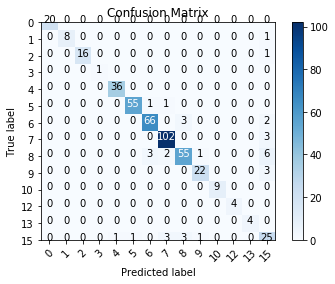

In [133]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix



cnf_matrix = confusion_matrix(gbt, y_test)

print(cnf_matrix)

# Create the basic matrix
plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) 

# Add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add appropriate axis scales
class_names = set(y) # Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add labels to each cell
thresh = cnf_matrix.max() / 2. # Used for text coloring below
# Here we iterate through the confusion matrix and append labels to our visualization 
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment='center',
                 color='white' if cnf_matrix[i, j] > thresh else 'black')

# Add a legend
plt.colorbar()
plt.show()

In [134]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    # Pseudocode/Outline:
    # Print the confusion matrix (optional)
    # Create the basic matrix
    # Add title and axis labels
    # Add appropriate axis scales
    # Add labels to each cell
    # Add a legend
    
    print(cm)

    plt.imshow(cm, cmap=cmap)
    
    # Add title and axis labels 
    plt.title('Confusion Matrix') 
    plt.ylabel('True label') 
    plt.xlabel('Predicted label')
    
    # Add appropriate axis scales
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Text formatting
    fmt = '.2f' if normalize else 'd'
    # Add labels to each cell
    thresh = cm.max() / 2.
    # Here we iterate through the confusion matrix and append labels to our visualization 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    # Add a legend
    plt.colorbar()
    plt.show() 

In [135]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    # Check if normalize is set to True
    # If so, normalize the raw confusion matrix before visualizing
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, cmap=cmap)
    
    # Add title and axis labels 
    plt.title('Confusion Matrix') 
    plt.ylabel('True label') 
    plt.xlabel('Predicted label')
    
    # Add appropriate axis scales
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Text formatting
    fmt = '.2f' if normalize else 'd'
    # Add labels to each cell
    thresh = cm.max() / 2.
    # Here we iterate through the confusion matrix and append labels to our visualization 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    # Add a legend
    plt.colorbar()
    plt.show() 

Normalized confusion matrix
[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.88888889 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.11111111]
 [0.         0.         0.94117647 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.05882353]
 [0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.96491228
  0.01754386 0.01754386 0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.92957746 0.         0.04225352

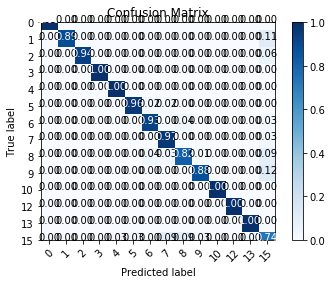

In [136]:
# Plot a normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

In [137]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [139]:
X

,Coupon,Yield,Weight (%),Price,Shares,Market Value,Notional Value,Market Cap (intraday) 5,Trailing P/E,Forward P/E 1,PEG Ratio (5 yr expected) 1,Price/Sales (ttm),Price/Book (mrq),Beta (5Y Monthly),% Held by Insiders 1,% Held by Institutions 1,Avg Vol (10 day) 3,Avg Vol (3 month) 3,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity,Sector_Communication,Sector_Consumer Discretionary,Sector_Consumer Staples,Sector_Energy,Sector_Financials,Sector_Health Care,Sector_Industrials,Sector_Information Technology,Sector_Materials,Sector_Real Estate,Sector_Utilities,Sector_nan,Exchange_NASDAQ,Exchange_New York Stock Exchange Inc.,Exchange_nan
0,3.250,3.580000,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,1858.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,4.000,3.440000,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,9740.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,6.450,2.411028,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,7488.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,3.625,2.130000,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,1736.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,2.875,2.480000,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,2435.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,3.450,2.460000,0.09,38.14,575844.0,21962690.16,21962690.16,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,1630.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1834,2.600,2.270000,0.09,38.14,575844.0,21962690.16,21962690.16,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,882.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1835,4.000,4.160000,0.09,38.14,575844.0,21962690.16,21962690.16,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,8187.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1836,2.875,2.060000,0.09,38.14,575844.0,21962690.16,21962690.16,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,534.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [140]:
y

0       6
1       6
2       6
3       6
4       6
       ..
1833    7
1834    7
1835    7
1836    7
1837    7
Name: Moody's Rating, Length: 1834, dtype: int64

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [142]:
gbt_clf = GradientBoostingClassifier(random_state=42)

gbt_cv_score = cross_val_score(gbt_clf, X_train, y_train, cv=3)
mean_gbt_cv_score = np.mean(gbt_cv_score)

print(f"Mean Cross Validation Score: {mean_gbt_cv_score :.2%}")

Mean Cross Validation Score: 87.57%


In [143]:
gbt_cv_score

array([0.87445887, 0.85185185, 0.90088106])

In [144]:
dt_param_grid = {

    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [145]:
# Instantiate GridSearchCV
gbt_grid_search = GridSearchCV(gbt_clf, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
gbt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [148]:
grid_result = gbt_grid_search.fit(X_train, y_train)

In [149]:
grid_result

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [150]:
grid_result_test = gbt_grid_search.fit(X_test, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [151]:
# Mean training score
gbt_gs_training_score = np.mean(gbt_grid_search.cv_results_['mean_train_score'])

# Mean test score
gbt_gs_testing_score = gbt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {gbt_gs_training_score :.2%}")
print(f"Mean Test Score: {gbt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
gbt_grid_search.best_params_

Mean Training Score: 99.97%
Mean Test Score: 100.00%
Best Parameter Combination Found During Grid Search:


{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 10}

In [152]:
gbt_clf = GradientBoostingClassifier(random_state=42)
mean_gbt_cv_score = np.mean(cross_val_score(gbt_clf, X_train, y_train, cv=3))

print(f"Mean Cross Validation Score for GBT Classifier: {mean_gbt_cv_score :.2%}")

Mean Cross Validation Score for GBT Classifier: 87.57%


In [153]:
gbt_clf = GradientBoostingClassifier(random_state=43)
mean_gbt_cv_score2 = np.mean(cross_val_score(gbt_clf, X_test, y_test, cv=3))

print(f"Mean Cross Validation Score for GBT Classifier: {mean_gbt_cv_score2 :.2%}")

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Mean Cross Validation Score for GBT Classifier: 80.40%


In [154]:
gbt_param_grid = {
    'n_estimators': [10, 30, 100],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

In [155]:
gbt_grid_search = GridSearchCV(gbt_clf, gbt_param_grid, cv=3, refit=True, return_train_score=True)
gbt_grid_search.fit(X_train, y_train)

print(f"Training Accuracy: {gbt_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {gbt_grid_search.best_params_}")

Training Accuracy: 88.07%

Optimal Parameters: {'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}


In [156]:
gbt_score = gbt_grid_search.score(X_test, y_test)

print('GBT grid search: ', gbt_score)

GBT grid search:  0.9084967320261438


In [158]:
df["Moody's Rating"].value_counts()

7     425
6     316
8     268
5     207
15    143
4     135
9     111
0      75
2      46
1      37
10     35
12     17
13     10
3       9
Name: Moody's Rating, dtype: int64

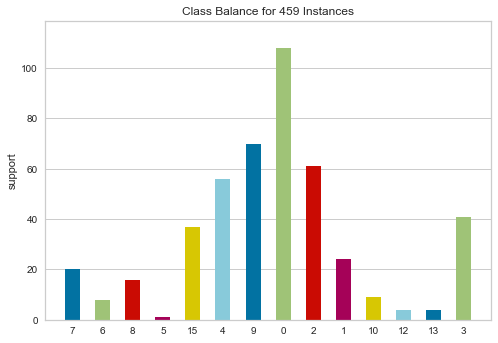

In [162]:
from yellowbrick.datasets import load_game
from yellowbrick.target import ClassBalance

# Load the classification dataset
X, y = load_game()

# Instantiate the visualizer
visualizer = ClassBalance(labels=["7", "6", "8", "5", "15", "4", "9", "0", "2", "1", "10", "12", "13", "3"])

visualizer.fit(y_test)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

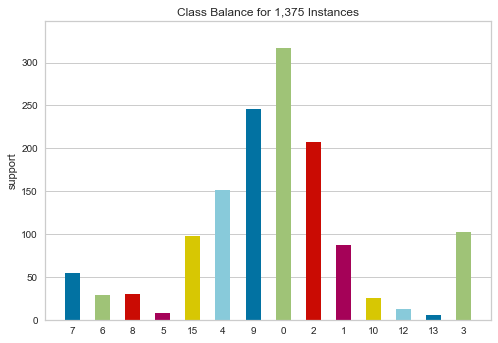

In [163]:
from yellowbrick.datasets import load_game
from yellowbrick.target import ClassBalance

# Load the classification dataset
X, y = load_game()

# Instantiate the visualizer
visualizer = ClassBalance(labels=["7", "6", "8", "5", "15", "4", "9", "0", "2", "1", "10", "12", "13", "3"])

visualizer.fit(y_train)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure